<a href="https://colab.research.google.com/github/Lucas-Siade/Data-Science/blob/main/DS%20-%20Regress%C3%A3o%20Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exemplo**

## **Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

!pip install ucimlrepo --quiet
from ucimlrepo import fetch_ucirepo

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

## **Dataset**

In [13]:
datasetRegLog = pd.concat([fetch_ucirepo(id=144).data.features, fetch_ucirepo(id=144).data.targets], axis=1)

#DEFINIÇÃO DAS COLUNAS
colunas = [
    "status_conta_corrente", "duracao", "historico_credito", "finalidade", "valor_credito",
    "poupanca", "tempo_emprego", "taxa_parcela", "estado_civil_sexo", "fiadores",
    "tempo_residencia", "propriedade", "idade", "outros_planos_parcelas", "moradia",
    "creditos_existentes", "profissao", "dependentes", "telefone", "trabalhador_estrangeiro"
]
datasetRegLog.columns = colunas + ["risco_credito"]

#TRADUÇÃO DOS VALORES
substituicoes = {
    "status_conta_corrente": {
        "A11": "< 0 DM",
        "A12": "0 <= ... < 200 DM",
        "A13": ">= 200 DM",
        "A14": "Sem conta"
    },
    "historico_credito": {
        "A30": "Sem crédito",
        "A31": "Quitado",
        "A32": "Pagamentos em dia",
        "A33": "Atrasos",
        "A34": "Crítico"
    },
    "finalidade": {
        "A40": "Carro (novo)",
        "A41": "Carro (usado)",
        "A42": "Móveis",
        "A43": "Rádio/TV",
        "A44": "Eletrodomésticos",
        "A45": "Reparos",
        "A46": "Educação",
        "A47": "Férias",
        "A48": "Requalificação",
        "A49": "Negócios",
        "A410": "Outros"
    },
    "poupanca": {
        "A61": "< 100 DM",
        "A62": "100 <= ... < 500 DM",
        "A63": "500 <= ... < 1000 DM",
        "A64": ">= 1000 DM",
        "A65": "Desconhecido"
    },
    "tempo_emprego": {
        "A71": "Desempregado",
        "A72": "< 1 ano",
        "A73": "1 <= ... < 4 anos",
        "A74": "4 <= ... < 7 anos",
        "A75": ">= 7 anos"
    },
    "estado_civil_sexo": {
        "A91": "Homem div/sep",
        "A92": "Mulher div/cas",
        "A93": "Homem solteiro",
        "A94": "Homem cas/viúvo",
        "A95": "Mulher solteira"
    },
    "fiadores": {
        "A101": "Nenhum",
        "A102": "Co-Aplicante",
        "A103": "Fiador"
    },
    "propriedade": {
        "A121": "Imóvel",
        "A122": "Seguro",
        "A123": "Carro/Outros",
        "A124": "Desconhecido"
    },
    "outros_planos_parcelas": {
        "A141": "Banco",
        "A142": "Lojas",
        "A143": "Nenhum"
    },
    "moradia": {
        "A151": "Aluguel",
        "A152": "Própria",
        "A153": "Gratuita"
    },
    "profissao": {
        "A171": "Desempregado",
        "A172": "Não qualificado",
        "A173": "Qualificado",
        "A174": "Administração"
    },
    "telefone": {
        "A191": "Não",
        "A192": "Sim"
    },
    "trabalhador_estrangeiro": {
        "A201": "Sim",
        "A202": "Não"
    },
    "risco_credito": {
        1: "Bom",
        2: "Ruim"
    }
}

for coluna, mapping in substituicoes.items():
    datasetRegLog[coluna] = datasetRegLog[coluna].map(mapping)

display(datasetRegLog.head())

,status_conta_corrente,duracao,historico_credito,finalidade,valor_credito,poupanca,tempo_emprego,taxa_parcela,estado_civil_sexo,fiadores,...,propriedade,idade,outros_planos_parcelas,moradia,creditos_existentes,profissao,dependentes,telefone,trabalhador_estrangeiro,risco_credito
0,< 0 DM,6,Crítico,Rádio/TV,1169,Desconhecido,>= 7 anos,4,Homem solteiro,Nenhum,...,Imóvel,67,Nenhum,Própria,2,Qualificado,1,Sim,Sim,Bom
1,0 <= ... < 200 DM,48,Pagamentos em dia,Rádio/TV,5951,< 100 DM,1 <= ... < 4 anos,2,Mulher div/cas,Nenhum,...,Imóvel,22,Nenhum,Própria,1,Qualificado,1,Não,Sim,Ruim
2,Sem conta,12,Crítico,Educação,2096,< 100 DM,4 <= ... < 7 anos,2,Homem solteiro,Nenhum,...,Imóvel,49,Nenhum,Própria,1,Não qualificado,2,Não,Sim,Bom
3,< 0 DM,42,Pagamentos em dia,Móveis,7882,< 100 DM,4 <= ... < 7 anos,2,Homem solteiro,Fiador,...,Seguro,45,Nenhum,Gratuita,1,Qualificado,2,Não,Sim,Bom
4,< 0 DM,24,Atrasos,Carro (novo),4870,< 100 DM,1 <= ... < 4 anos,3,Homem solteiro,Nenhum,...,Desconhecido,53,Nenhum,Gratuita,2,Qualificado,2,Não,Sim,Ruim


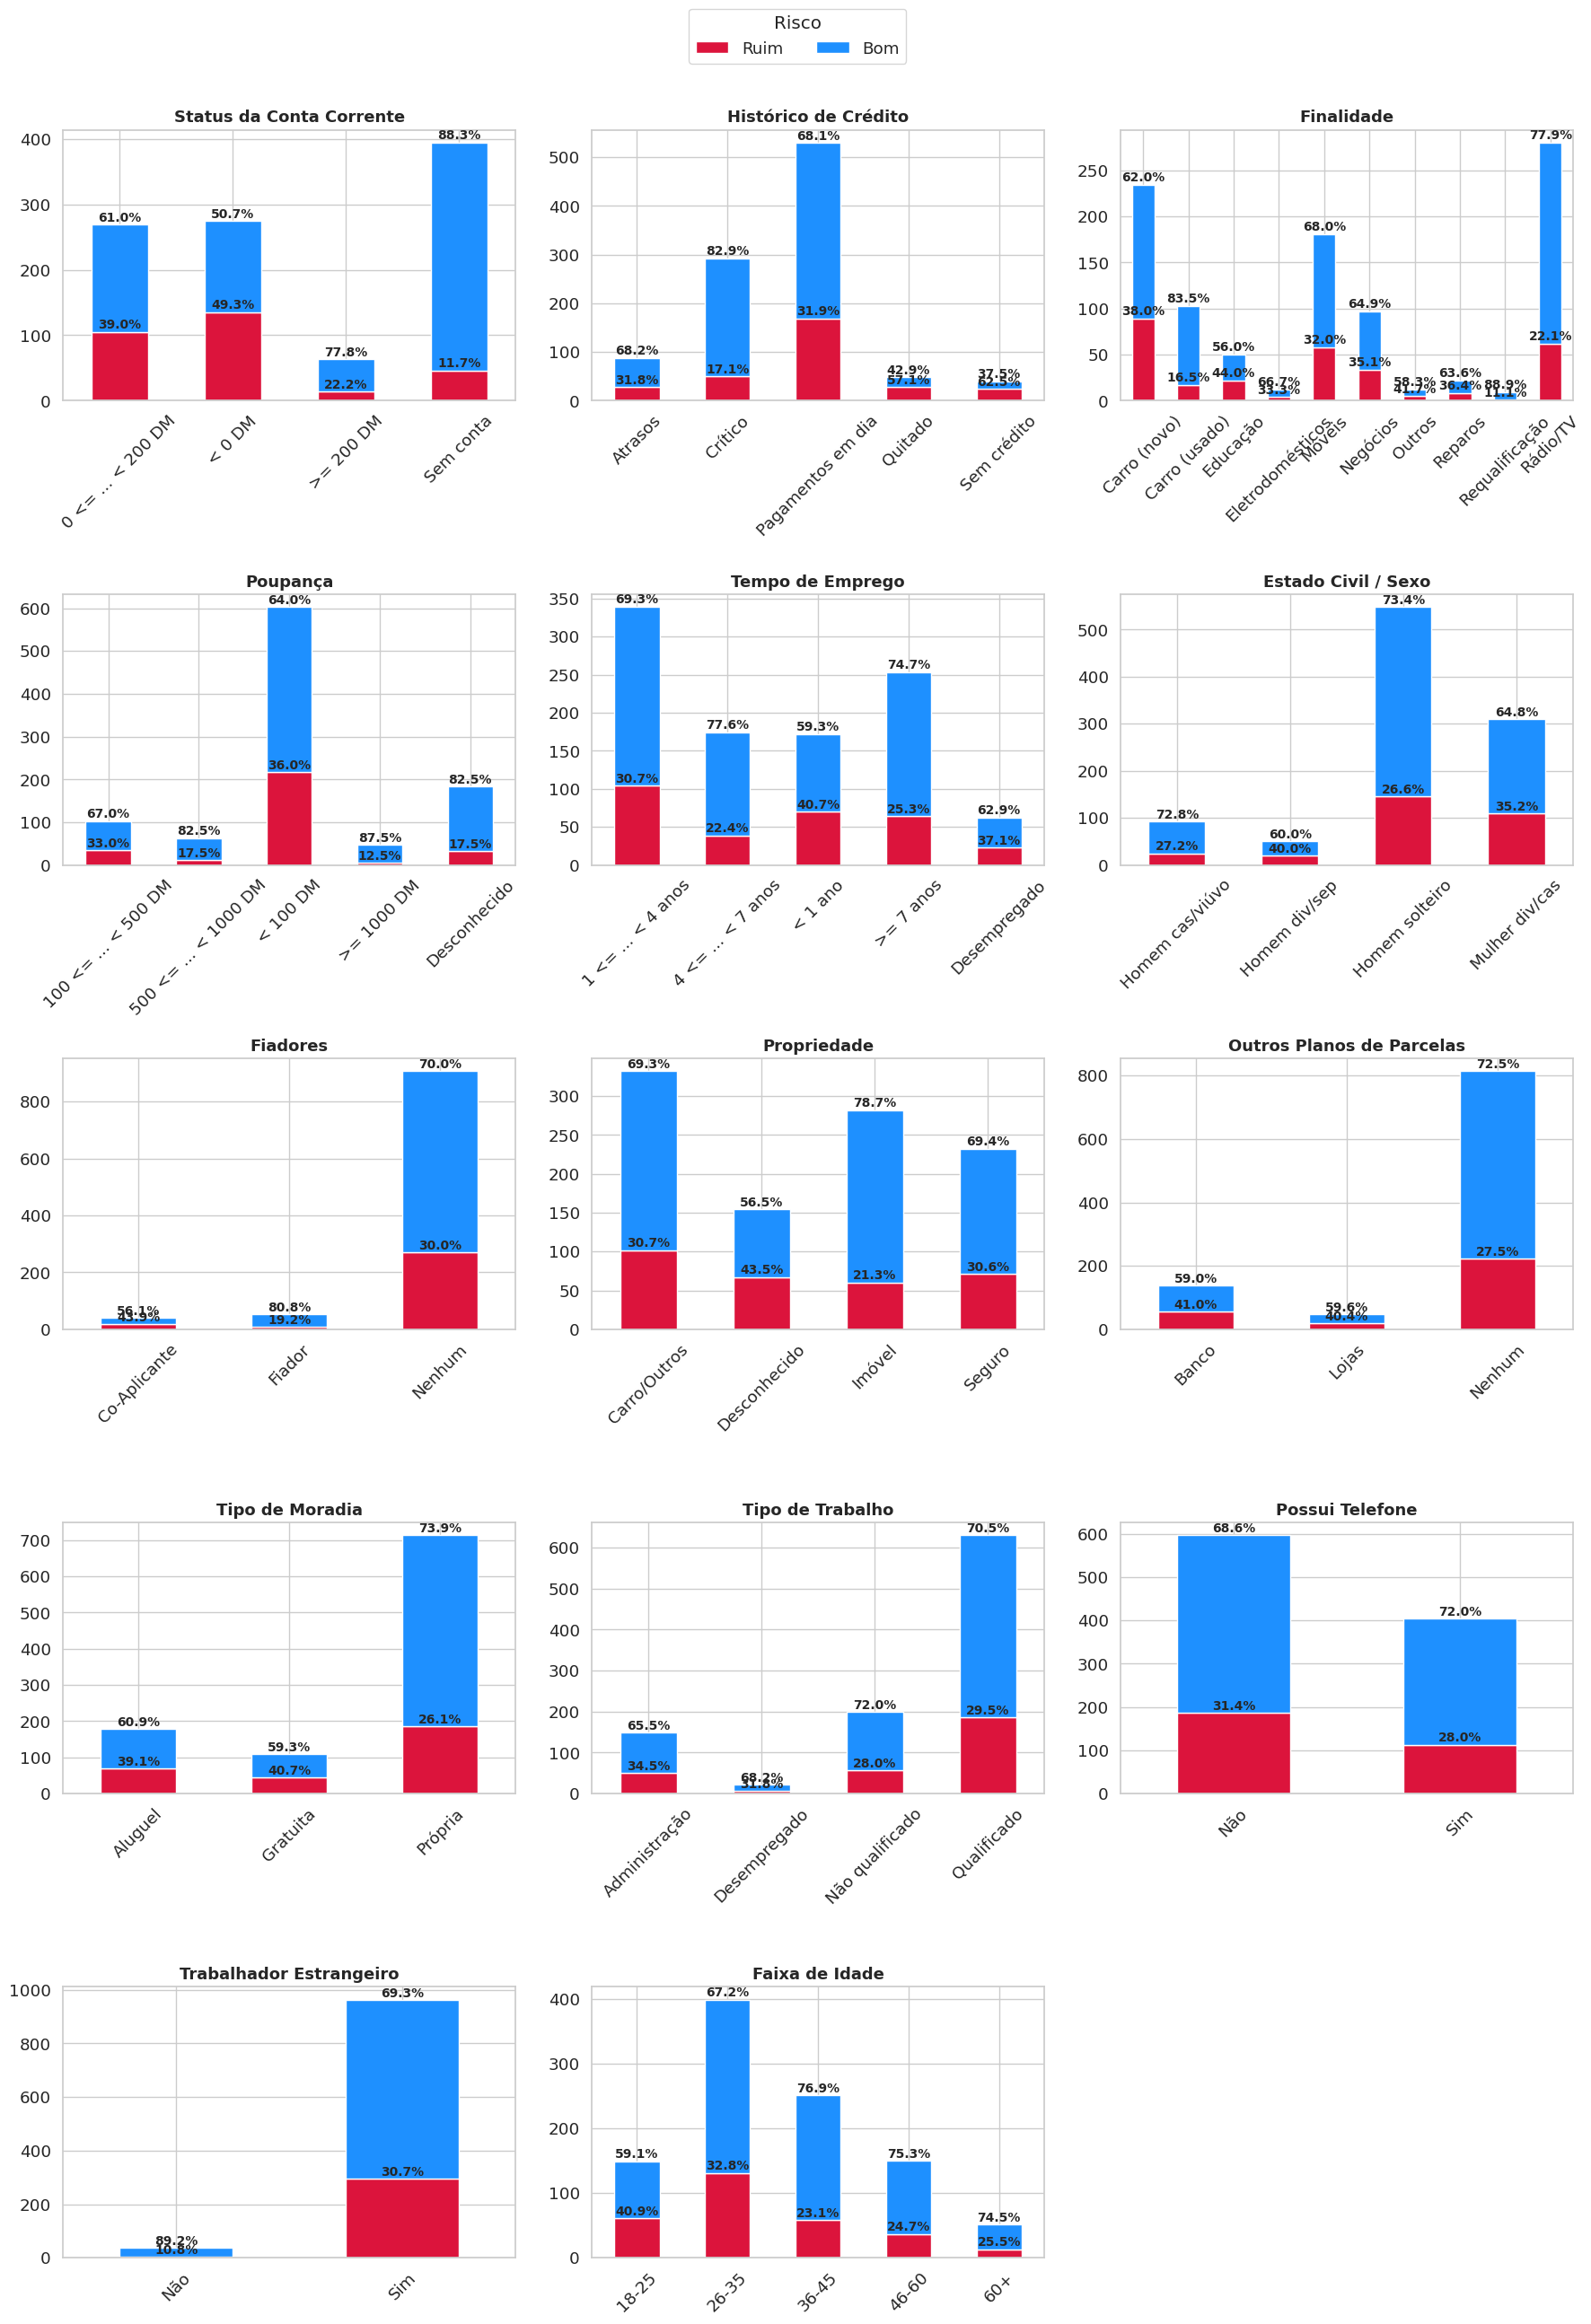

In [14]:
#AGRUPAR IDADES
bins = [18, 25, 35, 45, 60, 100]
labels = ['18-25', '26-35', '36-45', '46-60', '60+']
datasetRegLog['faixa_idade'] = pd.cut(datasetRegLog['idade'], bins=bins, labels=labels, right=False)

colunas_cat = datasetRegLog.select_dtypes(include=['object', 'category']).columns.tolist()
colunas_cat.remove('risco_credito')
total_colunas = len(colunas_cat)

nomes_arrumados = {
    "status_conta_corrente": "Status da Conta Corrente",
    "historico_credito": "Histórico de Crédito",
    "finalidade": "Finalidade",
    "poupanca": "Poupança",
    "tempo_emprego": "Tempo de Emprego",
    "estado_civil_sexo": "Estado Civil / Sexo",
    "fiadores": "Fiadores",
    "propriedade": "Propriedade",
    "outros_planos_parcelas": "Outros Planos de Parcelas",
    "moradia": "Tipo de Moradia",
    "profissao": "Tipo de Trabalho",
    "telefone": "Possui Telefone",
    "trabalhador_estrangeiro": "Trabalhador Estrangeiro",
    "faixa_idade": "Faixa de Idade",
}

cols = 3
rows = (total_colunas + cols - 1) // cols

sns.set(style="whitegrid", font_scale=1.2)
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten()

for i, coluna in enumerate(colunas_cat):

    ax = axes[i]

    contagem = datasetRegLog.groupby([coluna, "risco_credito"], observed=True).size().unstack(fill_value=0)

    contagem = contagem.reindex(columns=['Ruim', 'Bom'], fill_value=0)

    contagem.plot(
        kind='bar',
        stacked=True,
        color=['crimson', 'dodgerblue'],
        ax=ax,
        legend=False
    )

    for idx, categoria in enumerate(contagem.index):
        total = contagem.loc[categoria].sum()

        altura_acumulada = 0
        for risco, cor in zip(['Ruim', 'Bom'], ['crimson', 'dodgerblue']):
            valor = contagem.loc[categoria, risco]
            if valor > 0:
                percentual = (valor / total) * 100
                y_offset = altura_acumulada + valor
                ax.text(
                    idx,
                    y_offset + 1,
                    f"{percentual:.1f}%",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    weight='bold'
                )
                altura_acumulada += valor

    titulo = nomes_arrumados[coluna]
    ax.set_title(titulo, fontsize=13, fontweight='bold')

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.legend(['Ruim', 'Bom'], title='Risco', loc='upper center', bbox_to_anchor=(0.5, 1.04), ncol=2)

plt.tight_layout()
plt.show()

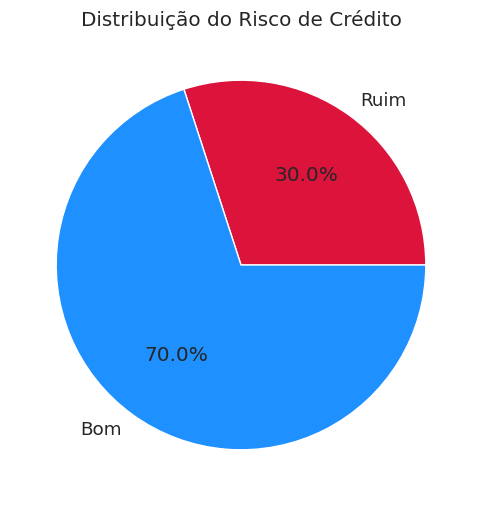

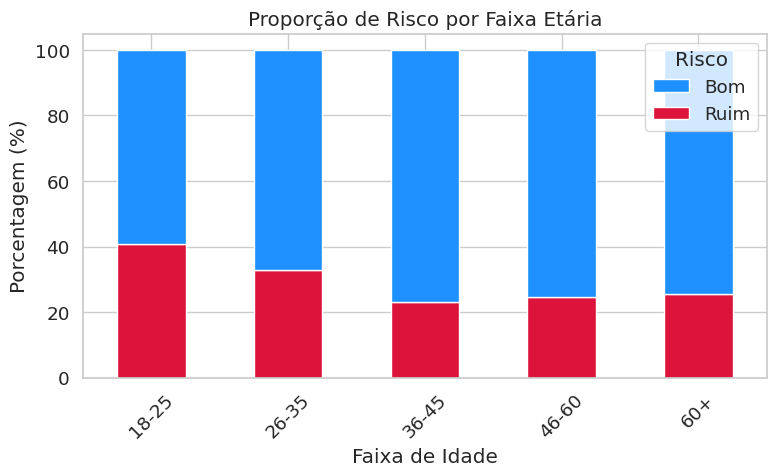

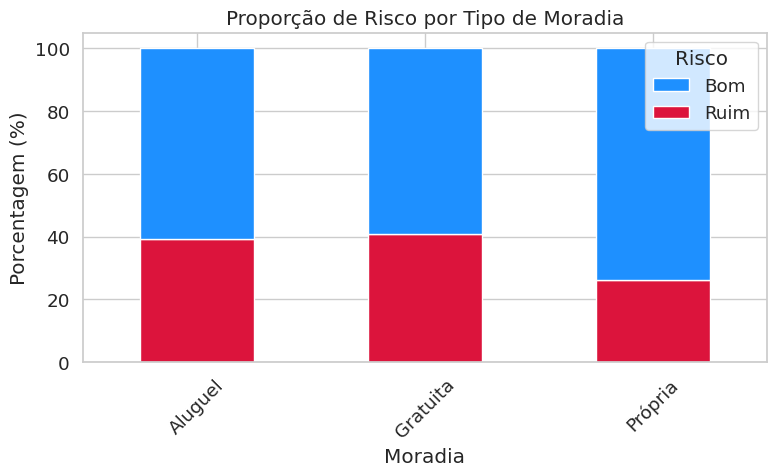

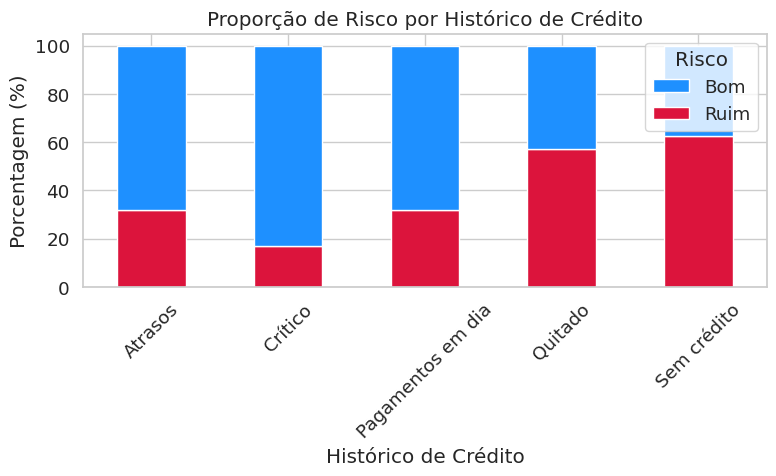

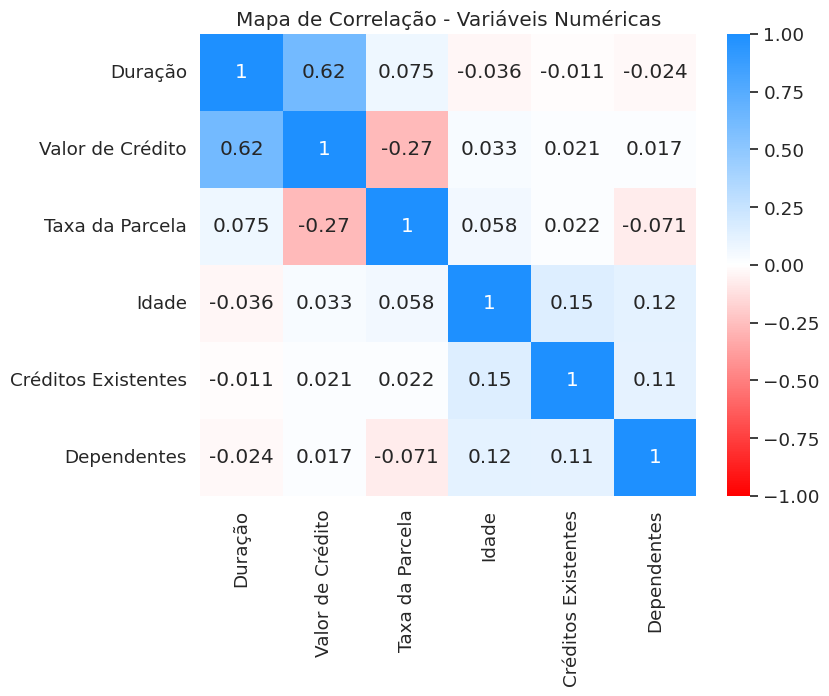

In [15]:
#DISTRIBUIÇÃO DO RISCO
datasetRegLog["risco_credito"].value_counts().reindex(["Ruim", "Bom"]).plot.pie(
    autopct="%1.1f%%",
    figsize=(6, 6),
    title="Distribuição do Risco de Crédito",
    colors=['crimson', 'dodgerblue']
)

plt.ylabel("")
plt.show()

def grafico_empilhado_percentual(coluna, titulo, xlabel):
    contagem = datasetRegLog.groupby([coluna, "risco_credito"], observed=True).size().unstack(fill_value=0)

    contagem = contagem.reindex(columns=["Ruim", "Bom"])

    proporcao = contagem.div(contagem.sum(axis=1), axis=0) * 100

    ax = proporcao.plot(
        kind='bar',
        stacked=True,
        figsize=(8, 5),
        color=['crimson', 'dodgerblue']
    )

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], ["Bom", "Ruim"], title="Risco")

    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel("Porcentagem (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

grafico_empilhado_percentual("faixa_idade", "Proporção de Risco por Faixa Etária", "Faixa de Idade")
grafico_empilhado_percentual("moradia", "Proporção de Risco por Tipo de Moradia", "Moradia")
grafico_empilhado_percentual("historico_credito", "Proporção de Risco por Histórico de Crédito", "Histórico de Crédito")

#HEATMAP DE CORRELAÇÃO
datasetRegLog_num = datasetRegLog[["duracao", "valor_credito", "taxa_parcela", "idade", "creditos_existentes", "dependentes"]]
datasetRegLog_num = datasetRegLog_num.rename(columns={
    "duracao": "Duração",
    "valor_credito": "Valor de Crédito",
    "taxa_parcela": "Taxa da Parcela",
    "idade": "Idade",
    "creditos_existentes": "Créditos Existentes",
    "dependentes": "Dependentes"
})

plt.figure(figsize=(8, 6))
sns.heatmap(
    datasetRegLog_num.corr(),
    annot=True,
    cmap=LinearSegmentedColormap.from_list("crimson_dodger", ['red', 'white', 'dodgerblue']),
    vmin=-1, vmax=1)

plt.title("Mapa de Correlação - Variáveis Numéricas")
plt.show()

## **Modelo**

In [16]:
#DEFINIR VARIÁVEIS
datasetRegLog["risco_credito"] = datasetRegLog["risco_credito"].map({'Bom': 1, 'Ruim': 0})

XRegLog = datasetRegLog.drop("risco_credito", axis=1)
YRegLog = datasetRegLog["risco_credito"]

XRegLog = pd.get_dummies(XRegLog, drop_first=True)

#DIVISÃO EM TREINO E TESTE
XRegLog_treino, XRegLog_teste, YRegLog_treino, YRegLog_teste = train_test_split(XRegLog, YRegLog, test_size=0.2, stratify=YRegLog)

#ESCALONAR OS DADOS
scaler = StandardScaler()
XRegLog_treino = scaler.fit_transform(XRegLog_treino)
XRegLog_teste = scaler.transform(XRegLog_teste)

#TREINO DO MODELO
modelRegLog = LogisticRegression()
modelRegLog.fit(XRegLog_treino, YRegLog_treino)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.62      0.50      0.56        60
           1       0.80      0.87      0.84       140

    accuracy                           0.76       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.75      0.76      0.75       200



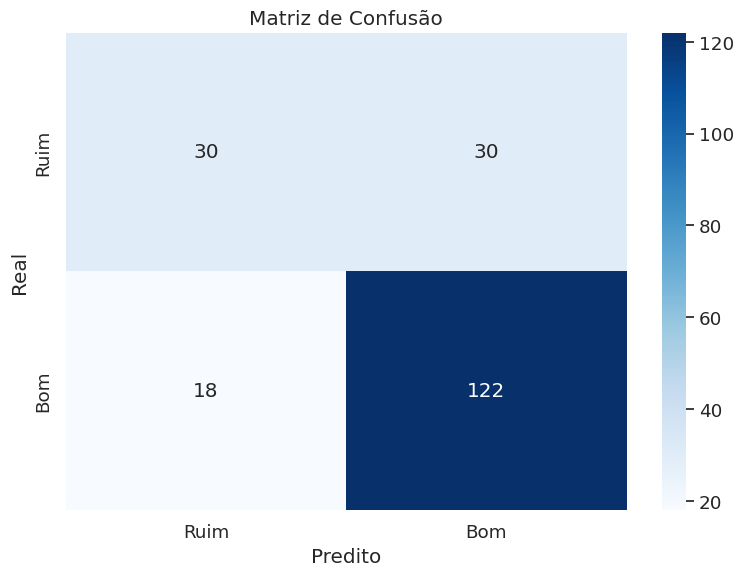

In [17]:
#PREVISÕES
YRegLog_pred = modelRegLog.predict(XRegLog_teste)

#AVALIAÇÃO DO MODELO
print(classification_report(YRegLog_teste, YRegLog_pred))

CM = confusion_matrix(YRegLog_teste, YRegLog_pred)
labels = ['Ruim', 'Bom']

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')

plt.tight_layout()
plt.show()

## **Extra**

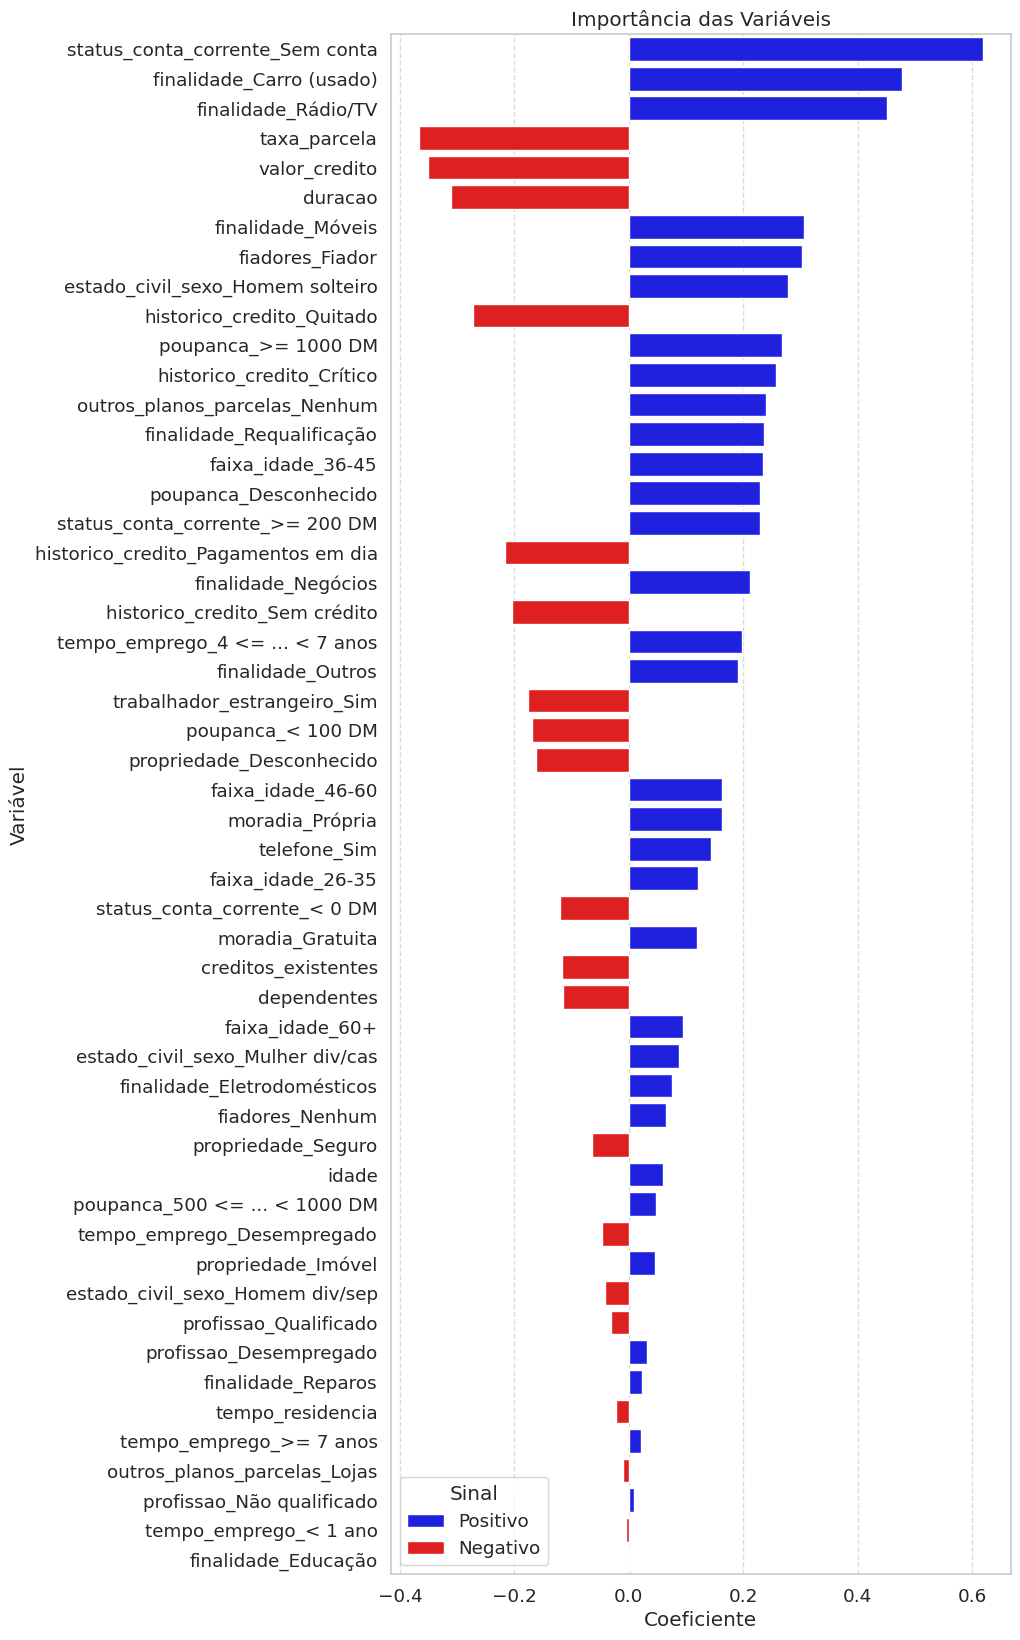

In [18]:
datasetRegLogCoef = pd.DataFrame({
    'Variável': XRegLog.columns,
    'Coeficiente': modelRegLog.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

datasetRegLogCoef['Sinal'] = datasetRegLogCoef['Coeficiente'].apply(lambda x: 'Positivo' if x > 0 else 'Negativo')

plt.figure(figsize=(8,20))
sns.barplot(
    x='Coeficiente',
    y='Variável',
    data=datasetRegLogCoef,
    hue='Sinal',
    dodge=False,
    palette={'Positivo': 'blue', 'Negativo': 'red'}
)

plt.title('Importância das Variáveis')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()